In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# train_data = pd.read_csv('drive/MyDrive/sentiment analysis data/train_tweet.csv')
train_data = pd.read_csv('Twitter_Data.csv')

In [5]:
train_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [6]:
train_data = train_data.dropna()

In [7]:
train_data.isnull().any()

clean_text    False
category      False
dtype: bool

In [6]:
train_data[train_data['category'] == 0].head(10)

,clean_text,category
1,talk all the nonsense and continue all the dra...,0.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
13,one vote can make all the difference anil kapo...,0.0
14,one vote can make all the difference anil kapo...,0.0
16,vote modi who has not created jobs,0.0
17,through our vote ensure govt need and deserve ...,0.0
22,crush jaws those who shoutmodimodi says jds ml...,0.0
26,has already taken notice and ordered probe now...,0.0


In [ ]:
train_data[train_data['category'] == 1].head(10)

,clean_text,category
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0
10,things like demonetisation gst goods and servi...,1.0
11,hope tuthukudi people would prefer honest well...,1.0
12,calm waters wheres the modi wave,1.0
18,dont play with the words was talking about the...,1.0
20,was the one who recently said that people who ...,1.0


In [ ]:
train_data.category.value_counts()

 1.0    72249
 0.0    55211
-1.0    35509
Name: category, dtype: int64

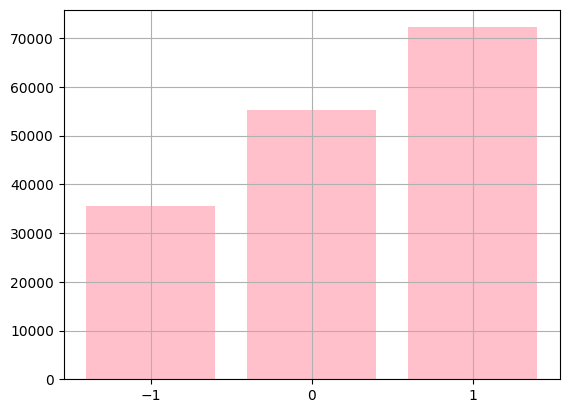

In [ ]:
plt.bar(train_data.category.value_counts().index, train_data.category.value_counts().values, color='pink')
plt.grid()
plt.xticks(train_data.category.unique());

In [ ]:
train_data['clean_text'].str.len()

0         210
1          68
2         117
3         212
4          81
         ... 
162975    108
162976    248
162977     51
162978     77
162979    216
Name: clean_text, Length: 162969, dtype: int64

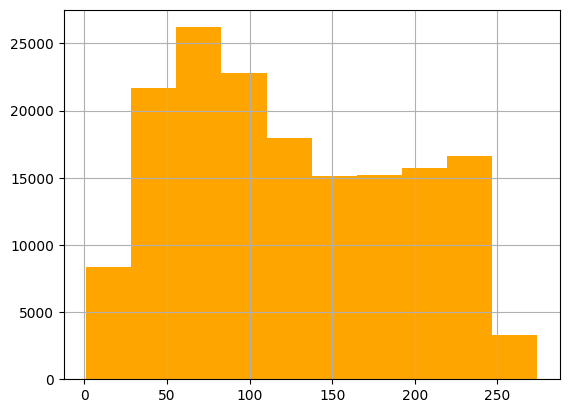

In [ ]:
plt.hist(train_data['clean_text'].str.len(), color='orange')
plt.grid()

In [ ]:
train_data['len'] = train_data['clean_text'].str.len()

In [ ]:
train_data.head()

,clean_text,category,len
0,when modi promised “minimum government maximum...,-1.0,210
1,talk all the nonsense and continue all the dra...,0.0,68
2,what did just say vote for modi welcome bjp t...,1.0,117
3,asking his supporters prefix chowkidar their n...,1.0,212
4,answer who among these the most powerful world...,1.0,81


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(train_data.clean_text)

In [ ]:
words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
sum_words = words.sum(axis=0) # вираховуємо суму по вертикалі, щоб взнати кількість появлення кожного слова в твітах

In [ ]:
sum_words

matrix([[25,  2,  2, ...,  1,  1,  1]])

In [ ]:
sum_words.shape

(1, 106644)

In [ ]:
len(cv.vocabulary_)

106644

In [ ]:
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]

In [ ]:
words_freq[:10]

[('modi', 155546),
 ('promised', 1434),
 ('minimum', 591),
 ('government', 5881),
 ('maximum', 228),
 ('governance', 532),
 ('expected', 375),
 ('begin', 145),
 ('difficult', 346),
 ('job', 2128)]

In [ ]:
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

In [ ]:
words_freq[:10]

[('modi', 155546),
 ('india', 29153),
 ('bjp', 14646),
 ('people', 13896),
 ('congress', 12829),
 ('like', 12578),
 ('narendra', 11466),
 ('govt', 10025),
 ('vote', 9304),
 ('dont', 8405)]

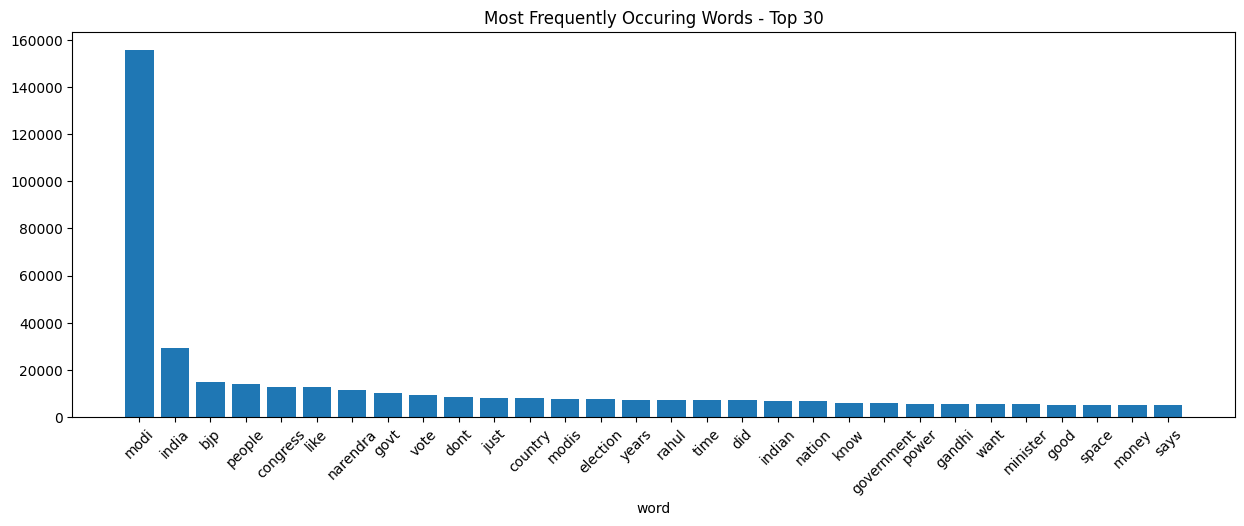

In [ ]:
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.figure(figsize=(15, 5))
plt.bar(frequency['word'][:30], frequency['freq'][:30])
plt.title("Most Frequently Occuring Words - Top 30")

x = plt.gca().xaxis

for item in x.get_ticklabels():
  item.set_rotation(45)

plt.xlabel('word');

In [ ]:
import re

def hashtag_extract(x):
  hashtags = []

  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)

  return hashtags

In [ ]:
ht_regular = hashtag_extract(train_data['clean_text'][train_data['category'] == 1])

In [ ]:
ht_regular = sum(ht_regular, [])

In [ ]:
import nltk
a = nltk.FreqDist(ht_regular)

In [ ]:
a

FreqDist({})

In [ ]:
d = pd.DataFrame({'Hashtag': a.keys(), 'Count': a.values()})

In [ ]:
d.head()

,Hashtag,Count


In [ ]:
d = d.nlargest(columns='Count', n=20)

In [ ]:
plt.figure(figsize=(15, 7))
plt.bar(d['Hashtag'], d['Count'])

ax = plt.gca().xaxis

for item in ax.get_ticklabels():
  item.set_rotation(45)

plt.xlabel('Hashtag')
plt.ylabel('Count');

In [ ]:
tokenized_tweet = train_data['clean_text'].apply(lambda x: x.split())
import gensim

model_w2v = gensim.models.Word2Vec(
    tokenized_tweet,
    vector_size=200,
    window=5,
    min_count=2,
    sg = 1,
    hs = 0,
    negative = 10,
    workers= 2,
    seed = 34)

In [ ]:
model_w2v.train(tokenized_tweet, total_examples=len(train_data['clean_text']), epochs=20)

In [ ]:
model_w2v.wv.most_similar(positive='dinner')

[('spaghetti', 0.6507106423377991),
 ('bay.', 0.6123366355895996),
 ('#prosecco', 0.6115171313285828),
 ('shopping!', 0.6029046773910522),
 ('weekend...', 0.5887517929077148),
 ('#wanderlust', 0.5844047665596008),
 ('7!', 0.5817091464996338),
 ('podium', 0.5778950452804565),
 ('ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»â\x9d¤ï¸\x8fâ\x9d¤ï¸\x8f',
  0.5772229433059692),
 ('enroute', 0.5744678378105164)]

In [ ]:
model_w2v.wv.most_similar(negative='hate')

[('#hungry', 0.03286698833107948),
 ('#foodie', 0.03070606105029583),
 ('#community', 0.027692340314388275),
 ('ð\x9f\x8d»', 0.023062145337462425),
 ('â\x99¡', 0.01474042609333992),
 ('#crafts', 0.013190964236855507),
 ('#staup', 0.011294074356555939),
 ('lion', 0.009441480971872807),
 ('#bus', 0.0092909662052989),
 ('street,', 0.007629462983459234)]

In [9]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
train_corpus = []

for post in train_data['clean_text']:
  review = re.sub('[^a-zA-Z]', ' ', post)
  review = review.lower().split()

  # ps = PorterStemmer()

  # review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]

  review = ' '.join(review)
  train_corpus.append(review)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import joblib
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(train_corpus).toarray()
joblib.dump(cv, 'vectorizer.pkl')

['vectorizer.pkl']

In [12]:
y = train_data['category']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
joblib.dump(sc, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred = model.predict(X_valid)
print("Training Accuracy :", model.score(X_train, y_train))
print("Validation Accuracy :", model.score(X_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9993945641680166
Validation Accuracy : 0.8625285325086518
[[ 5877  1222  1834]
 [   91 13275   494]
 [  669  1291 15990]]


In [ ]:
from sklearn.linear_model import LogisticRegression

model_linear = LogisticRegression()
model_linear.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model_linear.predict(X_valid)
print("Training Accuracy :", model_linear.score(X_train, y_train))
print("Validation Accuracy :", model_linear.score(X_valid, y_valid))
print("F1 score :", f1_score(y_valid, y_pred))


cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9851487213716574
Validation Accuracy : 0.9416843949443123
F1 score : 0.5933682373472949
[[7185  247]
 [ 219  340]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model_tree.predict(X_valid)
print("Training Accuracy :", model_tree.score(X_train, y_train))
print("Validation Accuracy :", model_tree.score(X_valid, y_valid))
print("F1 score :", f1_score(y_valid, y_pred))


cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9292954573895632
F1 score : 0.5232067510548523
[[7116  316]
 [ 249  310]]


In [ ]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model_svc.predict(X_valid)
print("Training Accuracy :", model_svc.score(X_train, y_train))
print("Validation Accuracy :", model_svc.score(X_valid, y_valid))
print("F1 score :", f1_score(y_valid, y_pred))


cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.978181969880272
Validation Accuracy : 0.9521962207483419
F1 score : 0.4986876640419947
[[7419   13]
 [ 369  190]]


In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model_xgb.predict(X_valid)
print("Training Accuracy :", model_xgb.score(X_train, y_train))
print("Validation Accuracy :", model_xgb.score(X_valid, y_valid))
print("F1 score :", f1_score(y_valid, y_pred))


cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9608693838388053
Validation Accuracy : 0.9550744587661119
F1 score : 0.575147928994083
[[7389   43]
 [ 316  243]]


In [17]:
joblib.dump(model, 'model.pkl')

['model.pkl']